# Data APIs

## The World Bank Data API

In several of the notebooks above we have loaded datasets into a python pandas dataframe for subsequent. Local copies of some of these datasets had been previously saved to disk but in a few cases we read in the data directly from an online sources via a data API. This section explains how that is done in a bit more depth.  Some of the possible advantages of reading in the data this way is that it allows would-be users to modify and extend the analysis, perhaps focusing on different time-periods or adding in other variables of interest.  

Easy to use python wrappers for data APIs have been written for the World Bank and several other online data providers (including FRED, Eurostat, and many many others). Below I explain how to use the [pandas-datareader](http://pandas-datareader.readthedocs.org/) library to read in data from the [World Bank's datasets](http://data.worldbank.org/).  


If you haven't already installed the pandas-datareader library you can do so directly from a jupyter notebook code cell:

```!pip install pandas-datareader```

Once the library is in installed we can load it as:

In [1]:
%matplotlib inline
import seaborn as sns
import warnings
import numpy as np
import statsmodels.formula.api as smf

D:\Users\jconning\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from pandas_datareader import wb

### Data on urban bias

Our earlier analysis of the Harris_Todaro migration model suggested that policies designed to favor certain sectors or labor groups 

Let's search for indicators (and their identification codes) relating to GDP per capita and urban population share.  We could look these up in a book or from the website http://data.worldbank.org/ but we can also search for keywords directly.

First gdp per capita:

In [3]:
wb.search('gdp.*capita.*const').iloc[:,:2]

,id,name
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
6551,NY.GDP.PCAP.KD,GDP per capita (constant 2005 US$)
6553,NY.GDP.PCAP.KN,GDP per capita (constant LCU)
6555,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2011 internation..."


Now let's look for data on urban population share:

In [4]:
wb.search('urban population').iloc[:,:2]

,id,name
43,1.3_ACCESS.ELECTRICITY.URBAN,Access to electricity (% of urban population)
117,2.3_ACCESS.NONSOLIDFUEL.URBAN,Access to Non-Solid Fuel (% of urban population)
4250,EG.ELC.ACCS.UR.ZS,"Access to electricity, urban (% of urban popul..."
4269,EG.NSF.ACCS.UR.ZS,"Access to non-solid fuel, urban (% of urban po..."
4333,EN.POP.SLUM.UR.ZS,"Population living in slums, (% of urban popula..."
4336,EN.URB.LCTY.UR.ZS,Population in the largest city (% of urban pop...
8315,SH.H2O.SAFE.UR.ZS,"Improved water source, urban (% of urban popul..."
8460,SH.STA.ACSN.UR,"Improved sanitation facilities, urban (% of ur..."
8665,SI.POV.URHC,Urban poverty headcount ratio at national pove...
9301,SP.URB.GROW,Urban population growth (annual %)


Let's use the ones we like but use a python dictionary to rename these to shorter variable names when we load the data into a python dataframe:

In [5]:
indicators = ['NY.GDP.PCAP.KD', 'SP.URB.TOTL.IN.ZS']

Since we are interested in exploring the extent of 'urban bias' in some countries, let's load data from 1980 which was toward the end of the era of import-substituting industrialization when urban-biased policies were claimed to be most pronounced.

In [6]:
dat = wb.download(indicator=indicators, country = 'all', start=1980, end=1980)

If we plot and regress log gdp per capita against urban extent we get a pretty tight fit:

In [7]:
dat.columns = [['gdppc', 'urbpct']]
dat['lngpc']  = np.log(dat.gdppc)

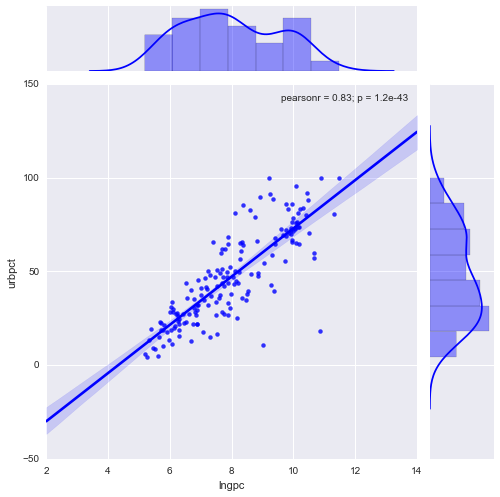

In [8]:
g = sns.jointplot("lngpc", "urbpct", data=dat, kind="reg",
                  color ="b", size=7)

But there are several middle income countries that seem to have a greater urban extent than would be predicted from fiting a model to all countries.  Let's look at the regression line.

In [9]:
mod = smf.ols("urbpct ~ lngpc", dat).fit()

In [10]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 urbpct   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     365.0
Date:                Tue, 26 Jan 2016   Prob (F-statistic):           1.16e-43
Time:                        15:49:19   Log-Likelihood:                -671.34
No. Observations:                 167   AIC:                             1347.
Df Residuals:                     165   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -55.6725      5.471    -10.175      0.0

Now let's just look at a list of countries sorted by the size of their residuals in this regression line.  Countries with the largest residuals had urbanization in excess of what the model predicts from their 1980 level of income per capita.

Here is the sorted list of top 20 outliers.  Leaving aside Singapore, Malta, and Hong-Kong (which are all small city-island states so it's logical that they should be mostly urban) the fact does stand out that there are several Latin American countries on the list.  This may be consistent with the criticism that in the 1960s and 1970s many Latin American countries were engaged in many urban-biased policies associated with import substitution and excessive bureaucratic centralization. 

In [11]:
mod.resid.sort_values(ascending=False).head(20)

country               year
Singapore             1980    37.269694
Uruguay               1980    33.634024
Chile                 1980    32.499684
Malta                 1980    30.909419
Hong Kong SAR, China  1980    28.250739
Argentina             1980    28.207125
Iraq                  1980    26.246138
Israel                1980    24.097519
Cuba                  1980    22.486781
Venezuela, RB         1980    22.378343
Belgium               1980    21.527457
Peru                  1980    18.885775
Bulgaria              1980    18.700355
Colombia              1980    17.704645
Jordan                1980    17.231500
Bahrain               1980    16.277191
Egypt, Arab Rep.      1980    15.805312
Bermuda               1980    15.753038
Suriname              1980    14.205778
Brazil                1980    13.962592
dtype: float64